# Buiding CNN - Convolutional Neural Network

## Fashion Classification 
*Train Convolutional Neural Network on 60,000 Fashion-MNIST Images*

*Test Convolutional Neural Network on 10,000 Fashion-MNIST Images* 

In [1]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras


In [2]:
## Load Dataset 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
## Shape of X_train,y_train
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
## shape of X_test,y_test
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

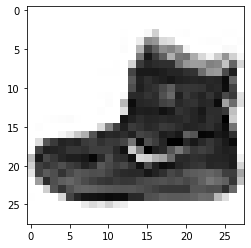

In [5]:
## Show Image
plt.imshow(X_train[0],cmap="Greys")

In [6]:
## Preprocessing the data
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_train = X_train/255
X_test = X_test/255

In [7]:
## Split dataSet 
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [8]:
## Model Building 
model =keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 33s 13ms/step - loss: 0.9355 - accuracy: 0.6935 - val_loss: 0.4264 - val_accuracy: 0.8537
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3883 - accuracy: 0.8638 - val_loss: 0.3607 - val_accuracy: 0.8766
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3413 - accuracy: 0.8794 - val_loss: 0.3361 - val_accuracy: 0.8811
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3060 - accuracy: 0.8928 - val_loss: 0.3138 - val_accuracy: 0.8900
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2898 - accuracy: 0.8976 - val_loss: 0.3043 - val_accuracy: 0.8941
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2688 - accuracy: 0.9046 - val_loss: 0.2979 - val_accuracy: 0.8953
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2504 - accuracy: 0.9107 - val_loss: 0.2908 - val_accuracy: 0.8983
Epoch 8/10
94/94 [

9


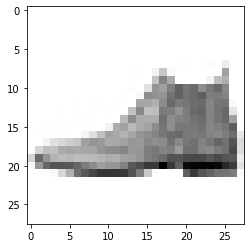

In [14]:
image_index = 0
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [16]:
y_pred = model.predict(X_test).round(2)

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2744 - accuracy: 0.9016


[0.2743791937828064, 0.9016000032424927]

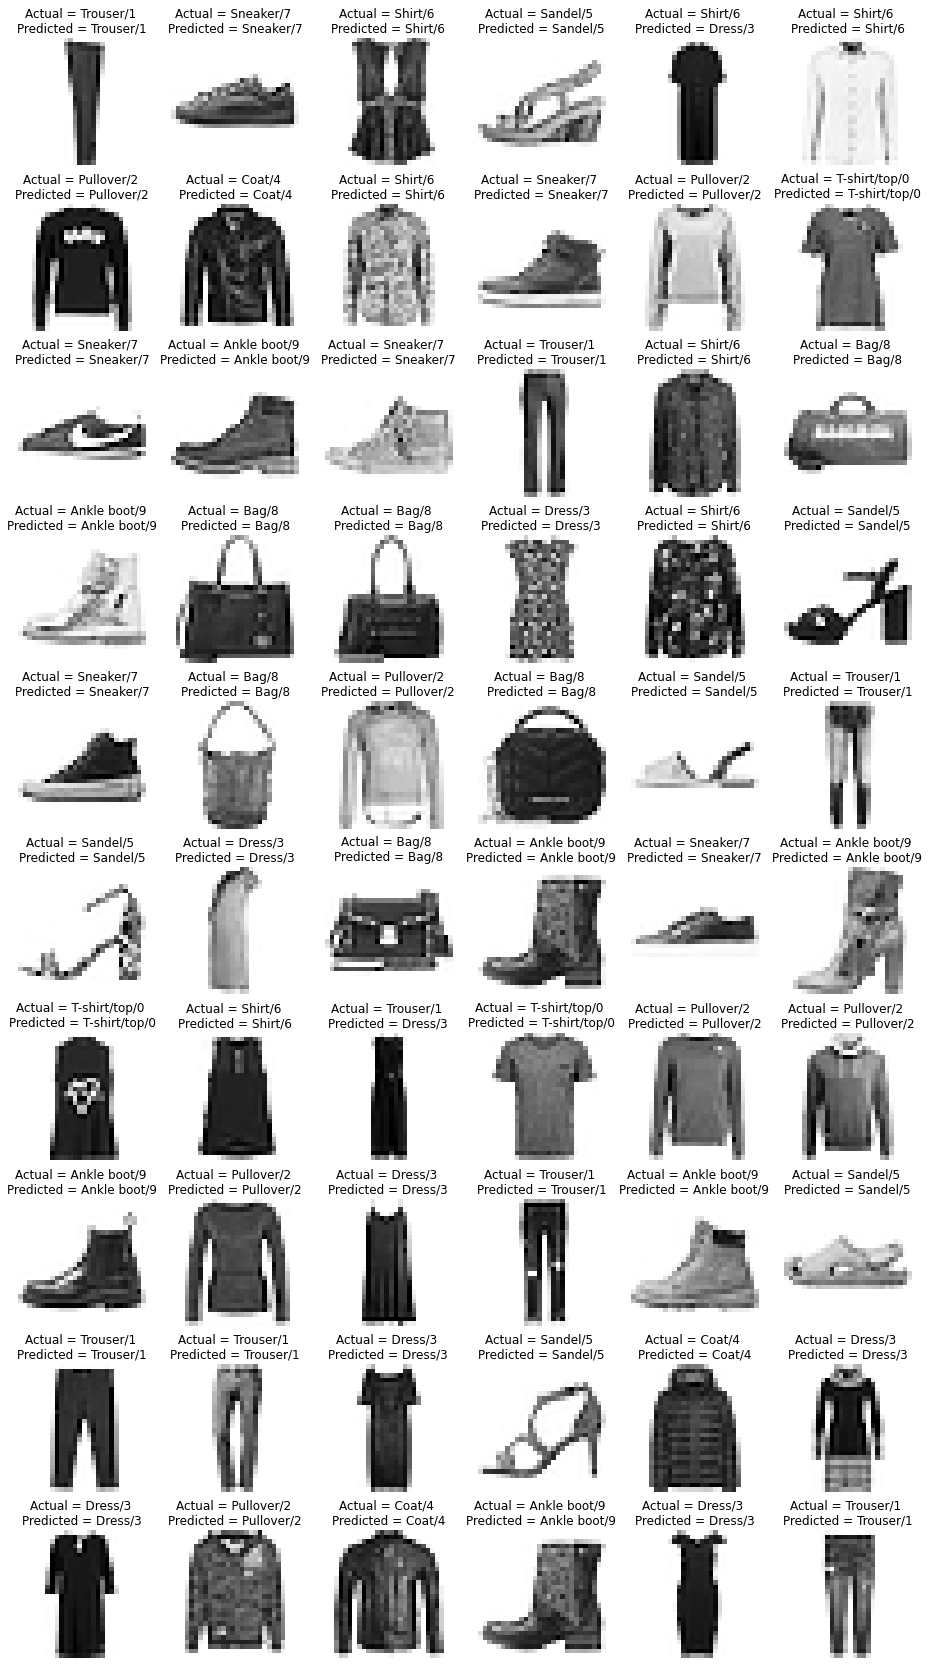

In [17]:
## Visualizing Output 
plt.figure(figsize=(16,30))
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandel","Shirt","Sneaker","Bag","Ankle boot"]
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {}/{} \nPredicted = {}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis("off")

## Confusion Metrix

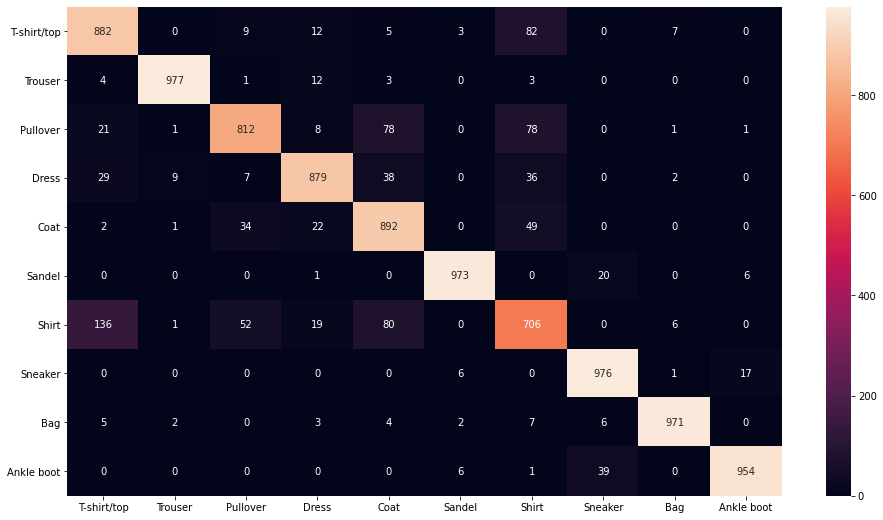

In [19]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [20]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.89      0.81      0.85      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.81      0.89      0.85      1000
      Sandel       0.98      0.97      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [21]:
## Complex Model
model2 =keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256,activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [22]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model2.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
94/94 [==============================] - 2s 15ms/step - loss: 1.2639 - accuracy: 0.5522 - val_loss: 0.4859 - val_accuracy: 0.8082
Epoch 2/20
94/94 [==============================] - 1s 12ms/step - loss: 0.5005 - accuracy: 0.8138 - val_loss: 0.3865 - val_accuracy: 0.8590
Epoch 3/20
94/94 [==============================] - 1s 12ms/step - loss: 0.4060 - accuracy: 0.8542 - val_loss: 0.3369 - val_accuracy: 0.8758
Epoch 4/20
94/94 [==============================] - 1s 11ms/step - loss: 0.3471 - accuracy: 0.8746 - val_loss: 0.3138 - val_accuracy: 0.8865
Epoch 5/20
94/94 [==============================] - 1s 12ms/step - loss: 0.3119 - accuracy: 0.8862 - val_loss: 0.2894 - val_accuracy: 0.8966
Epoch 6/20
94/94 [==============================] - 1s 12ms/step - loss: 0.2924 - accuracy: 0.8930 - val_loss: 0.2807 - val_accuracy: 0.9003
Epoch 7/20
94/94 [==============================] - 1s 12ms/step - loss: 0.2769 - accuracy: 0.8986 - val_loss: 0.2734 - val_accuracy: 0.9029
Epoch 8/20
94

In [24]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2447 - accuracy: 0.9181


[0.2446960210800171, 0.9180999994277954]